# Sistem Penilaian Kelayakan Penerima Bantuan Sosial berbasis Fusi Data dengan pendekatan Deep Learning

Halo semua, bagaimana kabarnya? Semoga kabar baik

Dalam notebook implementasi sistem ini, program akan menerima data Sagis PKH dan akan menghasilkan label penilaian. Urutan implementasi terdiri dari:
1. asd
2. asdasd
3. asdas

# Import Packages

In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf
from tensorflow.keras import Sequential
from tqdm import tqdm
import random

In [2]:
class_names = ['layak', 'tidak-layak']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

# Create data testing

In [56]:
id_1 = [2701,2710,2742]
id_2 = [3013,3054,3125]
test1 = pd.read_csv('data_testing/layak.csv').iloc[id_1]
test2 = pd.read_csv('data_testing/tidak_layak.csv').iloc[id_2]
df_test = test1.append(test2)
id_1.extend(id_2)
df_test.insert(loc=0, column='Image', value=[str(i)+'.jpg' for i in id_1])
df_test['Label'] = ['layak', 'layak', 'layak', 'tidak layak', 'tidak layak', 'tidak layak']
df_test.to_csv('df_test.csv', index=False)

C:\Users\Agus Zainal Arifin\AppData\Local\Temp\ipykernel_29472\1846811384.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = test1.append(test2)


# 1. Loading the Data
Membaca data input

## Load Data Test
Data testing consist of image name, questionare data, and label

In [57]:
df_test = pd.read_csv('df_test.csv')
df_test

Image  NIK Target Survey  Nama Lengkap           Propinsi, Kab/Kota  \
0  2701.jpg   3573024307690003       WINARTI      JAWA TIMUR, KOTA MALANG   
1  2710.jpg   3578044202820006     SULIYANTI      JAWA TIMUR, KOTA MALANG   
2  2742.jpg   3509175203890001  INA HOIRIYAH      JAWA TIMUR, KAB. JEMBER   
3  3013.jpg   3507146003690002       HOLIFAH      JAWA TIMUR, KAB. MALANG   
4  3054.jpg   3510165801680002  MUGI HARTINI  JAWA TIMUR, KAB. BANYUWANGI   
5  3125.jpg   3507066404700001   SITI AMINAH      JAWA TIMUR, KAB. MALANG   

       Kecamatan, Desa/Kel                       Alamat  \
0           KLOJEN, SAMAAN           JL. GILIMANUK 83 B   
1     LOWOKWARU, LOWOKWARU  JL. LETJEN SUTOYO IV / 28-B   
2             AJUNG, AJUNG            DUSUN AJUNG WETAN   
3     BULULAWANG, SUKONOLO     JL TEUKU UMAR DSN KRAJAN   
4   BANYUWANGI, KARANGREJO      JL. IKAN GURITA NO.70 B   
5  AMPELGADING, ARGOYUWONO                DSN ARGOMULYO   

                    Koordinat Ada tempat berteduh tetap  \
0   -7.95670931, 112.62498835                        Ya   
1     -7.9578487, 112.6359441                        Ya   
2   -8.21266509, 113.67968777                        Ya   
3  -8.09586, 112.652091666667                        Ya   
4     -8.2189918, 114.3795112                        Ya   
5     -8.2342981, 112.8773942                        Ya   

  Tinggal bersama anggota keluarga KK bekerja  \
0                               Ya         Ya   
1                               Ya         Ya   
2                               Ya         Ya   
3                               Ya         Ya   
4                               Ya         Ya   
5                               Ya         Ya   

  Pernah khawatir /pernah tidak makan Pengeluaran pangan > 70% pengeluaran  \
0                                  Ya                                   Ya   
1                                  Ya                                Tidak   
2                                  Ya                                   Ya   
3                                  Ya                                   Ya   
4                               Tidak                                Tidak   
5                               Tidak                                   Ya   

  Ada pengeluaran pakaian dalam setahun Sebagian besar berlantai tanah  \
0                                 Tidak                          Tidak   
1                                    Ya                          Tidak   
2                                    Ya                          Tidak   
3                                    Ya                          Tidak   
4                                    Ya                          Tidak   
5                                 Tidak                          Tidak   

  Sebagian besar berdinding bambu / kawat / kayu Memiliki jamban sendiri  \
0                                          Tidak                      Ya   
1                                          Tidak                      Ya   
2                                          Tidak                      Ya   
3                                          Tidak                      Ya   
4                                          Tidak                      Ya   
5                                          Tidak                      Ya   

  Penerangan dari listrik 450VA / bukan listrik Pekerjaan Hasil Survey  \
0                                            Ya    BELUM/TIDAK BEKERJA   
1                                            Ya    BELUM/TIDAK BEKERJA   
2                                            Ya  MENGURUS RUMAH TANGGA   
3                                            Ya  MENGURUS RUMAH TANGGA   
4                                         Tidak        punya kos kosan   
5                                            Ya     BURUH HARIAN LEPAS   

         Label  
0        layak  
1        layak  
2        layak  
3  tidak layak  
4  tidak layak  
5  tidak layak

## Load data Image

In [64]:
def load_image(image_file):  
    images = []
    for i in image_file:
        print("Loading {}".format(i))
        
        try:
            # Get the path name of the image
            img_path = os.path.join('img', i)

            # Open and resize the img
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, IMAGE_SIZE) 
            
            images.append(image)

        except:
            print("error read image", file)
            print(image)

    images = np.array(images, dtype = 'float32')  
    
    return images

In [65]:
df_test_images = load_image(df_test.Image)

Loading 2701.jpg
Loading 2710.jpg
Loading 2742.jpg
Loading 3013.jpg
Loading 3054.jpg
Loading 3125.jpg


In [70]:
df_test_images.shape

(6, 150, 150, 3)

## Questionare Data

In [76]:
df_test = pd.read_csv('df_test.csv')
df_test_q = df_test.drop(['Image', 'Label'], axis=1)
df_test_q

NIK Target Survey  Nama Lengkap           Propinsi, Kab/Kota  \
0   3573024307690003       WINARTI      JAWA TIMUR, KOTA MALANG   
1   3578044202820006     SULIYANTI      JAWA TIMUR, KOTA MALANG   
2   3509175203890001  INA HOIRIYAH      JAWA TIMUR, KAB. JEMBER   
3   3507146003690002       HOLIFAH      JAWA TIMUR, KAB. MALANG   
4   3510165801680002  MUGI HARTINI  JAWA TIMUR, KAB. BANYUWANGI   
5   3507066404700001   SITI AMINAH      JAWA TIMUR, KAB. MALANG   

       Kecamatan, Desa/Kel                       Alamat  \
0           KLOJEN, SAMAAN           JL. GILIMANUK 83 B   
1     LOWOKWARU, LOWOKWARU  JL. LETJEN SUTOYO IV / 28-B   
2             AJUNG, AJUNG            DUSUN AJUNG WETAN   
3     BULULAWANG, SUKONOLO     JL TEUKU UMAR DSN KRAJAN   
4   BANYUWANGI, KARANGREJO      JL. IKAN GURITA NO.70 B   
5  AMPELGADING, ARGOYUWONO                DSN ARGOMULYO   

                    Koordinat Ada tempat berteduh tetap  \
0   -7.95670931, 112.62498835                        Ya   
1     -7.9578487, 112.6359441                        Ya   
2   -8.21266509, 113.67968777                        Ya   
3  -8.09586, 112.652091666667                        Ya   
4     -8.2189918, 114.3795112                        Ya   
5     -8.2342981, 112.8773942                        Ya   

  Tinggal bersama anggota keluarga KK bekerja  \
0                               Ya         Ya   
1                               Ya         Ya   
2                               Ya         Ya   
3                               Ya         Ya   
4                               Ya         Ya   
5                               Ya         Ya   

  Pernah khawatir /pernah tidak makan Pengeluaran pangan > 70% pengeluaran  \
0                                  Ya                                   Ya   
1                                  Ya                                Tidak   
2                                  Ya                                   Ya   
3                                  Ya                                   Ya   
4                               Tidak                                Tidak   
5                               Tidak                                   Ya   

  Ada pengeluaran pakaian dalam setahun Sebagian besar berlantai tanah  \
0                                 Tidak                          Tidak   
1                                    Ya                          Tidak   
2                                    Ya                          Tidak   
3                                    Ya                          Tidak   
4                                    Ya                          Tidak   
5                                 Tidak                          Tidak   

  Sebagian besar berdinding bambu / kawat / kayu Memiliki jamban sendiri  \
0                                          Tidak                      Ya   
1                                          Tidak                      Ya   
2                                          Tidak                      Ya   
3                                          Tidak                      Ya   
4                                          Tidak                      Ya   
5                                          Tidak                      Ya   

  Penerangan dari listrik 450VA / bukan listrik Pekerjaan Hasil Survey  
0                                            Ya    BELUM/TIDAK BEKERJA  
1                                            Ya    BELUM/TIDAK BEKERJA  
2                                            Ya  MENGURUS RUMAH TANGGA  
3                                            Ya  MENGURUS RUMAH TANGGA  
4                                         Tidak        punya kos kosan  
5                                            Ya     BURUH HARIAN LEPAS

# Image Object Detection

In [77]:
# !git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
Updating files:  91% (1892/2057)
Updating files:  92% (1893/2057)
Updating files:  93% (1914/2057)
Updating files:  94% (1934/2057)
Updating files:  95% (1955/2057)
Updating files:  96% (1975/2057)
Updating files:  97% (1996/2057)
Updating files:  98% (2016/2057)
Updating files:  99% (2037/2057)
Updating files: 100% (2057/2057)
Updating files: 100% (2057/2057), done.


In [78]:
# %cd darknet
# !sed -i 's/OPENCV=0/OPENCV=1/' Makefile
# !sed -i 's/GPU=0/GPU=1/' Makefile
# !sed -i 's/CUDNN=0/CUDNN=1/' Makefile
# !sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

C:\Users\Agus Zainal Arifin\Documents\KP\image-classification\image-classification-house\7_data fusion\darknet


'sed' is not recognized as an internal or external command,
operable program or batch file.
'sed' is not recognized as an internal or external command,
operable program or batch file.
'sed' is not recognized as an internal or external command,
operable program or batch file.
'sed' is not recognized as an internal or external command,
operable program or batch file.


In [79]:
!/usr/local/cuda/bin/nvcc --version
!nvidia-smi

The system cannot find the path specified.
'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


In [80]:
!make

'make' is not recognized as an internal or external command,
operable program or batch file.


In [82]:
!curl https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0


## Good practice: scale the data

In [148]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [149]:
# with open('train_images.npy', 'wb') as f:
#     np.save(f, train_images)
# with open('train_labels.npy', 'wb') as f:
#     np.save(f, train_labels)

In [14]:
train_images = np.load('train_images.npy')
train_labels = np.load('train_labels.npy')

## Visualize the data
We can display an image from the training set.

In [157]:
def display_image(class_names, images, labels, index):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Foto {}.jpg : '.format(index+1) + class_names[labels[index]])
    plt.show()

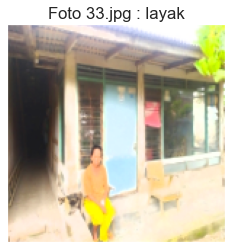

In [159]:
display_image(class_names, train_images, train_labels, 32)

We can display a random image from the training set.

In [161]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Foto {}.jpg : '.format(index) + class_names[labels[index]])
    plt.show()

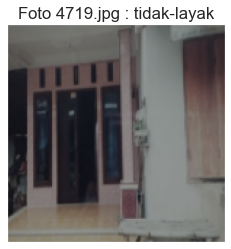

In [162]:
display_random_image(class_names, train_images, train_labels)

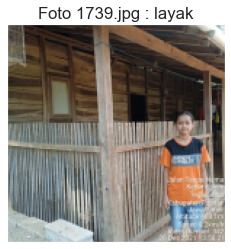

In [163]:
display_random_image(class_names, train_images, train_labels)

We can also display the first 10 images from the training set directly with a loop to get a better view

In [49]:
def display_examples(class_names, images, labels, title="Some examples of images of the dataset"):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(15,5))
    fig.suptitle(title, fontsize=16)
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

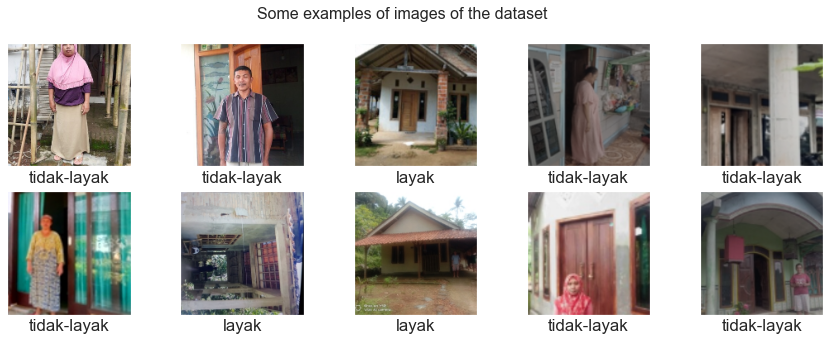

In [17]:
display_examples(class_names, train_images, train_labels)

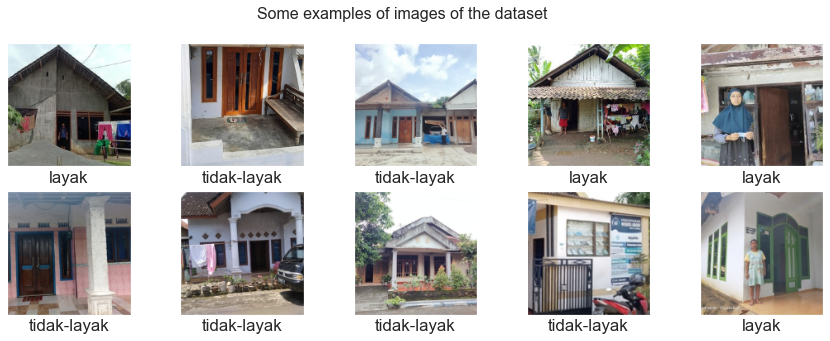

In [18]:
display_examples(class_names, test_images, test_labels)

# CNN

Steps are:
1. Build the model,
1. Compile the model,
1. Train / fit the data to the model,
1. Evaluate the model on the testing set,
1. Carry out an error analysis of our model.

We can build an easy model composed of different layers such as:
* Conv2D: (32 filters of size 3 by 3) The features will be "extracted" from the image.
* MaxPooling2D: The images get half sized.
* Flatten: Transforms the format of the images from a 2d-array to a 1d-array of 150 150 3 pixel values.
* Relu  : given a value x, returns max(x, 0).
* Softmax: 6 neurons, probability that the image belongs to one of the classes.

In [16]:
CNN_pre_trained = tf.keras.Sequential([
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3), padding='same'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    
#     Fully connected layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    
#     Classifier
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
#     model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
])

Then, we can compile it with some parameters such as:
* **Optimizer**: adam = RMSProp + Momentum.
What is Momentum and RMSProp ?
* Momentum = takes into account past gradient to have a better update.
* RMSProp = exponentially weighted average of the squares of past gradients.
* **Loss function**: we use sparse categorical crossentropy for classification, each images belongs to one class only

In [17]:
from keras.optimizers import SGD
opt = SGD(lr=0.001, momentum=0.9)
CNN_pre_trained.compile(optimizer = opt, loss = 'binary_crossentropy', metrics=['accuracy'])

C:\anaconda\envs\nevin\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


We fit the model to the data from the training set. The neural network will learn by itself the pattern in order to distinguish each category.

In [18]:
history = CNN_pre_trained.fit(train_images, train_labels, batch_size=16, epochs=10, validation_split = 0.2)

Epoch 1/10
270/270 [==============================] - 41s 141ms/step - loss: 1.6066 - accuracy: 0.0037 - val_loss: 3.6194 - val_accuracy: 0.0000e+00
Epoch 2/10
270/270 [==============================] - 35s 131ms/step - loss: 1.3776 - accuracy: 0.0262 - val_loss: 3.4663 - val_accuracy: 0.0000e+00
Epoch 3/10
270/270 [==============================] - 36s 134ms/step - loss: 1.3740 - accuracy: 0.0269 - val_loss: 3.3646 - val_accuracy: 0.0000e+00
Epoch 4/10
270/270 [==============================] - 36s 133ms/step - loss: 1.3730 - accuracy: 0.0271 - val_loss: 3.3217 - val_accuracy: 0.0000e+00
Epoch 5/10
270/270 [==============================] - 36s 133ms/step - loss: 1.3698 - accuracy: 0.0336 - val_loss: 3.2245 - val_accuracy: 9.2593e-04
Epoch 6/10
270/270 [==============================] - 36s 134ms/step - loss: 1.3694 - accuracy: 0.0280 - val_loss: 3.3051 - val_accuracy: 0.0037
Epoch 7/10
270/270 [==============================] - 32s 118ms/step - loss: 1.3670 - accuracy: 0.0317 - val_l

In [19]:
train_features_cnn = CNN_pre_trained.predict(train_images)

169/169 [==============================] - 13s 77ms/step


In [191]:
history = CNN_pre_trained_test.fit(test_images, test_labels, batch_size=16, epochs=10, validation_split = 0.2)

Epoch 1/10
115/115 [==============================] - 53s 432ms/step - loss: 6.7574 - accuracy: 0.0000e+00 - val_loss: 11.4145 - val_accuracy: 0.0000e+00
Epoch 2/10
115/115 [==============================] - 16s 141ms/step - loss: 6.7574 - accuracy: 0.0000e+00 - val_loss: 11.4145 - val_accuracy: 0.0000e+00
Epoch 3/10
115/115 [==============================] - 16s 142ms/step - loss: 6.7574 - accuracy: 0.0000e+00 - val_loss: 11.4145 - val_accuracy: 0.0000e+00
Epoch 4/10
115/115 [==============================] - 16s 138ms/step - loss: 6.7574 - accuracy: 0.0000e+00 - val_loss: 11.4145 - val_accuracy: 0.0000e+00
Epoch 5/10
115/115 [==============================] - 16s 139ms/step - loss: 6.7574 - accuracy: 0.0000e+00 - val_loss: 11.4145 - val_accuracy: 0.0000e+00
Epoch 6/10
115/115 [==============================] - 16s 141ms/step - loss: 6.7574 - accuracy: 0.0000e+00 - val_loss: 11.4145 - val_accuracy: 0.0000e+00
Epoch 7/10
115/115 [==============================] - 16s 143ms/step - loss:

In [192]:
test_features_cnn = CNN_pre_trained_test.predict(test_images)

72/72 [==============================] - 5s 71ms/step


In [189]:
print("train_features.shape:", train_features_cnn.shape)

train_features.shape: (5398, 50)


In [193]:
print("test_features.shape:", test_features_cnn.shape)

test_features.shape: (2298, 50)


In [20]:
# with open('train_features_cnn.npy', 'wb') as f:
#     np.save(f, train_features_cnn)
# with open('test_features_cnn.npy', 'wb') as f:
#     np.save(f, test_features_cnn)

In [21]:
import numpy as np

train_features_cnn = np.load('train_features_cnn.npy')
test_features_cnn = np.load('test_features_cnn.npy')

In [22]:
train_features_cnn

array([[0.19603807, 0.20316993, 0.17847651, ..., 0.24383043, 0.18642454,
        0.        ],
       [0.3426535 , 0.33893138, 0.27830315, ..., 0.3670948 , 0.32388815,
        0.        ],
       [0.27841634, 0.27339283, 0.27555048, ..., 0.25745034, 0.29637787,
        0.        ],
       ...,
       [0.18902686, 0.19123448, 0.17953655, ..., 0.20630367, 0.17635651,
        0.        ],
       [0.24049526, 0.2511344 , 0.22076192, ..., 0.25219244, 0.23585127,
        0.        ],
       [0.2291126 , 0.23604523, 0.20476961, ..., 0.27720797, 0.22919805,
        0.        ]], dtype=float32)

In [23]:
df_fusi = pd.concat([df_vector, pd.DataFrame(train_features_cnn)], axis=1).drop('index', axis=1)
df_fusi

image_name  Building  Clothing  Door  Dress  Footwear  Furniture  \
0         1.jpg         1         0     0      0         0          0   
1         2.jpg         1         0     0      0         0          0   
2         3.jpg         1         0     0      0         0          0   
3         4.jpg         1         1     0      0         0          0   
4         5.jpg         1         0     0      0         0          0   
...         ...       ...       ...   ...    ...       ...        ...   
5393   2696.jpg         1         0     0      0         0          0   
5394   2697.jpg         0         0     1      0         0          0   
5395   2698.jpg         0         1     0      0         0          0   
5396   2699.jpg         1         0     0      0         0          0   
5397   2700.jpg         0         1     0      0         0          0   

      Land vehicle  Plant  Sports_equipment  ...        40        41   42  \
0                0      0                 0  ...  0.193400  0.179251  0.0   
1                0      0                 0  ...  0.287868  0.314879  0.0   
2                0      0                 0  ...  0.295747  0.292363  0.0   
3                0      0                 0  ...  0.247480  0.245176  0.0   
4                0      0                 0  ...  0.232337  0.272412  0.0   
...            ...    ...               ...  ...       ...       ...  ...   
5393             0      0                 0  ...  0.226433  0.231009  0.0   
5394             0      0                 0  ...  0.229895  0.245525  0.0   
5395             0      0                 0  ...  0.200127  0.193322  0.0   
5396             0      0                 0  ...  0.229277  0.233229  0.0   
5397             0      1                 0  ...  0.204714  0.212607  0.0   

            43   44   45        46        47        48   49  
0     0.190687  0.0  0.0  0.192084  0.243830  0.186425  0.0  
1     0.327561  0.0  0.0  0.311445  0.367095  0.323888  0.0  
2     0.291812  0.0  0.0  0.274102  0.257450  0.296378  0.0  
3     0.272944  0.0  0.0  0.267595  0.269539  0.251353  0.0  
4     0.255114  0.0  0.0  0.264547  0.287113  0.253827  0.0  
...        ...  ...  ...       ...       ...       ...  ...  
5393  0.231670  0.0  0.0  0.234565  0.244166  0.232615  0.0  
5394  0.236573  0.0  0.0  0.246546  0.242537  0.246515  0.0  
5395  0.194209  0.0  0.0  0.184678  0.206304  0.176357  0.0  
5396  0.246352  0.0  0.0  0.230003  0.252192  0.235851  0.0  
5397  0.209228  0.0  0.0  0.221764  0.277208  0.229198  0.0  

[5398 rows x 77 columns]

In [25]:
# df_fusi.to_csv('df_fusi_cnn_featured.csv', index=False)

In [27]:
df_fusi = pd.read_csv('df_fusi_cnn_featured.csv')

In [28]:
df_fusi

image_name  Building  Clothing  Door  Dress  Footwear  Furniture  \
0         1.jpg         1         0     0      0         0          0   
1         2.jpg         1         0     0      0         0          0   
2         3.jpg         1         0     0      0         0          0   
3         4.jpg         1         1     0      0         0          0   
4         5.jpg         1         0     0      0         0          0   
...         ...       ...       ...   ...    ...       ...        ...   
5393   2696.jpg         1         0     0      0         0          0   
5394   2697.jpg         0         0     1      0         0          0   
5395   2698.jpg         0         1     0      0         0          0   
5396   2699.jpg         1         0     0      0         0          0   
5397   2700.jpg         0         1     0      0         0          0   

      Land vehicle  Plant  Sports_equipment  ...        40        41   42  \
0                0      0                 0  ...  0.193400  0.179251  0.0   
1                0      0                 0  ...  0.287868  0.314879  0.0   
2                0      0                 0  ...  0.295747  0.292363  0.0   
3                0      0                 0  ...  0.247480  0.245176  0.0   
4                0      0                 0  ...  0.232337  0.272412  0.0   
...            ...    ...               ...  ...       ...       ...  ...   
5393             0      0                 0  ...  0.226433  0.231009  0.0   
5394             0      0                 0  ...  0.229895  0.245525  0.0   
5395             0      0                 0  ...  0.200127  0.193322  0.0   
5396             0      0                 0  ...  0.229277  0.233229  0.0   
5397             0      1                 0  ...  0.204714  0.212607  0.0   

            43   44   45        46        47        48   49  
0     0.190687  0.0  0.0  0.192084  0.243830  0.186425  0.0  
1     0.327561  0.0  0.0  0.311445  0.367095  0.323888  0.0  
2     0.291812  0.0  0.0  0.274102  0.257450  0.296378  0.0  
3     0.272944  0.0  0.0  0.267595  0.269539  0.251353  0.0  
4     0.255114  0.0  0.0  0.264547  0.287113  0.253827  0.0  
...        ...  ...  ...       ...       ...       ...  ...  
5393  0.231670  0.0  0.0  0.234565  0.244166  0.232615  0.0  
5394  0.236573  0.0  0.0  0.246546  0.242537  0.246515  0.0  
5395  0.194209  0.0  0.0  0.184678  0.206304  0.176357  0.0  
5396  0.246352  0.0  0.0  0.230003  0.252192  0.235851  0.0  
5397  0.209228  0.0  0.0  0.221764  0.277208  0.229198  0.0  

[5398 rows x 77 columns]

# Classification

# SUDFX XGBOOST

In [29]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

C:\anaconda\envs\nevin\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [30]:
X = df_fusi.drop(['image_name', 'label'], axis=1)
y = df_fusi['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [31]:
import xgboost as xgboost

In [32]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

In [33]:
model.fit(X_train, y_train)

C:\anaconda\envs\nevin\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [62]:
X_test

Building  Clothing  Door  Dress  Footwear  Furniture  Land vehicle  \
3866         0         0     0      0         0          0             0   
929          0         0     0      0         0          0             0   
4889         1         0     0      0         0          0             0   
206          1         0     0      0         0          0             0   
4852         0         0     0      0         0          0             0   
...        ...       ...   ...    ...       ...        ...           ...   
3153         1         0     0      0         0          0             0   
4451         0         1     0      0         0          0             0   
2358         1         1     0      0         0          0             0   
1431         0         0     0      0         0          0             0   
1392         0         0     0      0         0          0             0   

      Plant  Sports_equipment  Tree  ...        40        41   42        43  \
3866      0                 0     0  ...  0.284621  0.281171  0.0  0.265170   
929       0                 0     0  ...  0.194391  0.201575  0.0  0.199729   
4889      0                 0     0  ...  0.190930  0.200696  0.0  0.201410   
206       0                 0     0  ...  0.251503  0.251834  0.0  0.263961   
4852      0                 0     0  ...  0.274550  0.269090  0.0  0.274217   
...     ...               ...   ...  ...       ...       ...  ...       ...   
3153      0                 0     0  ...  0.220165  0.223164  0.0  0.243795   
4451      0                 0     0  ...  0.284223  0.306469  0.0  0.322031   
2358      0                 0     0  ...  0.273270  0.280567  0.0  0.287890   
1431      0                 0     0  ...  0.278589  0.303739  0.0  0.230176   
1392      0                 0     0  ...  0.253864  0.280063  0.0  0.268764   

       44   45        46        47        48   49  
3866  0.0  0.0  0.256750  0.310270  0.289162  0.0  
929   0.0  0.0  0.205981  0.234773  0.205729  0.0  
4889  0.0  0.0  0.191796  0.220023  0.186020  0.0  
206   0.0  0.0  0.261414  0.266960  0.251092  0.0  
4852  0.0  0.0  0.260479  0.248079  0.251357  0.0  
...   ...  ...       ...       ...       ...  ...  
3153  0.0  0.0  0.229227  0.225953  0.218475  0.0  
4451  0.0  0.0  0.290675  0.279876  0.313232  0.0  
2358  0.0  0.0  0.273593  0.285216  0.286727  0.0  
1431  0.0  0.0  0.292428  0.329048  0.293300  0.0  
1392  0.0  0.0  0.297749  0.320241  0.297540  0.0  

[1350 rows x 75 columns]

In [34]:
y_pred = model.predict(X_test)

In [35]:
y_pred

array([0, 1, 0, ..., 1, 1, 1])

In [36]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8385185185185186

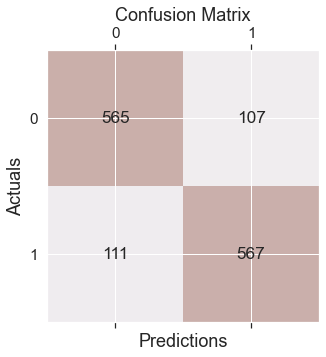

In [37]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [39]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       672
           1       0.84      0.84      0.84       678

    accuracy                           0.84      1350
   macro avg       0.84      0.84      0.84      1350
weighted avg       0.84      0.84      0.84      1350



# SUDFNN CNN

In [40]:
n_train, features = X_train.to_numpy().shape
n_train, features

(4048, 75)

In [41]:
train_feature = X_train.to_numpy()
train_feature_label = y_train.to_numpy()
print(train_feature.shape, train_feature_label.shape)

(4048, 75) (4048,)


In [42]:
y_train.to_numpy()

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [60]:
model_sudfnn = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (features,)),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

opt = SGD(lr=0.001, momentum=0.9)
model_sudfnn.compile(optimizer = opt, loss = 'binary_crossentropy', metrics=['accuracy'])

# Create a callback that saves the model's weights
folder = "training_1"
checkpoint_path = folder + "/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

history = model_sudfnn.fit(X_train, y_train, batch_size=64, epochs=20, validation_split = 0.2, 
                          callbacks=[cp_callback])

Epoch 1/20


C:\anaconda\envs\nevin\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


ValueError: in user code:

    File "C:\anaconda\envs\nevin\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\anaconda\envs\nevin\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\anaconda\envs\nevin\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\anaconda\envs\nevin\lib\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "C:\anaconda\envs\nevin\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\anaconda\envs\nevin\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_6" is incompatible with the layer: expected shape=(None, 0, 75), found shape=(None, 75)


In [56]:
X_train

Building  Clothing  Door  Dress  Footwear  Furniture  Land vehicle  \
770          0         1     0      0         0          0             0   
4692         1         0     0      0         0          0             0   
2726         0         0     0      0         0          0             0   
3970         1         1     0      0         0          0             0   
55           1         0     0      0         0          0             0   
...        ...       ...   ...    ...       ...        ...           ...   
905          0         0     0      0         0          0             0   
5192         0         1     0      0         0          0             0   
3980         1         0     0      0         0          0             0   
235          0         1     0      0         0          0             0   
5157         0         0     0      0         0          0             0   

      Plant  Sports_equipment  Tree  ...        40        41   42        43  \
770       0                 0     0  ...  0.246544  0.253505  0.0  0.258479   
4692      0                 0     0  ...  0.301206  0.296059  0.0  0.303197   
2726      1                 0     0  ...  0.277462  0.294089  0.0  0.289023   
3970      0                 0     0  ...  0.259100  0.309753  0.0  0.314113   
55        0                 0     0  ...  0.259336  0.277053  0.0  0.302147   
...     ...               ...   ...  ...       ...       ...  ...       ...   
905       0                 0     0  ...  0.204705  0.211993  0.0  0.220950   
5192      0                 0     0  ...  0.293648  0.284834  0.0  0.285162   
3980      0                 0     0  ...  0.235565  0.272525  0.0  0.269312   
235       0                 0     0  ...  0.240956  0.249649  0.0  0.269275   
5157      0                 0     0  ...  0.249323  0.280345  0.0  0.260681   

       44   45        46        47        48   49  
770   0.0  0.0  0.271953  0.269198  0.262338  0.0  
4692  0.0  0.0  0.290578  0.280133  0.302756  0.0  
2726  0.0  0.0  0.306099  0.318605  0.296679  0.0  
3970  0.0  0.0  0.306759  0.295831  0.311535  0.0  
55    0.0  0.0  0.267386  0.262757  0.263636  0.0  
...   ...  ...       ...       ...       ...  ...  
905   0.0  0.0  0.200749  0.204200  0.192182  0.0  
5192  0.0  0.0  0.288355  0.316256  0.274371  0.0  
3980  0.0  0.0  0.276813  0.308138  0.282636  0.0  
235   0.0  0.0  0.262273  0.279846  0.262532  0.0  
5157  0.0  0.0  0.249178  0.263185  0.252864  0.0  

[4048 rows x 75 columns]

In [51]:
predictions_train = model_sudfnn.predict(X_test)     # Vector of probabilities
# pred_labels_train = np.argmax(predictions_train, axis = 1) # We take the highest probability
pred_labels_train = ((predictions_train > 0.5)+0).ravel() # (n_images,)

pred_labels_train

43/43 [==============================] - 0s 2ms/step


array([0, 0, 0, ..., 0, 0, 0])

In [52]:
predictions_train

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]], dtype=float32)

In [254]:
model_sudfnn.predict(X_train.loc[:,0::])

127/127 [==============================] - 0s 3ms/step


array([[0.16984047],
       [0.08549133],
       [0.06359007],
       ...,
       [0.26453546],
       [0.1648316 ],
       [0.19957092]], dtype=float32)

In [182]:
train_features_cnn[0]

array([  0.      ,  23.605967, 223.72493 ,   0.      ,   0.      ,
       176.74551 ,   0.      ,   9.869249,   0.      ,   0.      ,
         0.      ,  35.098183,   0.      ,  17.73563 ,   0.      ,
        83.91846 ,   0.      ,  14.175805,   0.      ,   0.      ,
         0.      ,   0.      ,   0.      ,  18.949965,   0.      ,
         0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
         0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
         0.      ,   0.      ,  44.45001 ,   0.      ,   0.      ,
         9.816757,  37.120316,  61.20345 ,   0.      ,   0.      ,
         0.      ,   0.      ,   0.      ,   0.      ,   0.      ],
      dtype=float32)

In [21]:
# n_train, x, y, z = 
train_features.shape
# n_test, x, y, z = test_features.shape
# numFeatures = x * y * z

In [22]:
print("numFeatures:", numFeatures)
print("train_features.shape:", train_features.shape)
print("test_features.shape:", test_features.shape)

numFeatures: 8192
train_features.shape: (16194, 4, 4, 512)
test_features.shape: (2298, 4, 4, 512)


In [204]:
# callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)
# callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1)
# , callbacks=[callback]
history = model.fit(train_images, train_labels, batch_size=32, epochs=10, validation_split = 0.2)

Epoch 1/10
405/405 [==============================] - 256s 625ms/step - loss: 0.6924 - accuracy: 0.5590 - val_loss: 0.6711 - val_accuracy: 0.5949
Epoch 2/10
405/405 [==============================] - 244s 602ms/step - loss: 0.6561 - accuracy: 0.6100 - val_loss: 0.6604 - val_accuracy: 0.6033
Epoch 3/10
405/405 [==============================] - 221s 545ms/step - loss: 0.6320 - accuracy: 0.6398 - val_loss: 0.6440 - val_accuracy: 0.6172
Epoch 4/10
405/405 [==============================] - 222s 549ms/step - loss: 0.6049 - accuracy: 0.6647 - val_loss: 0.6455 - val_accuracy: 0.6227
Epoch 5/10
405/405 [==============================] - 225s 557ms/step - loss: 0.5653 - accuracy: 0.7024 - val_loss: 0.6715 - val_accuracy: 0.6261
Epoch 6/10
405/405 [==============================] - 224s 554ms/step - loss: 0.5116 - accuracy: 0.7393 - val_loss: 0.6761 - val_accuracy: 0.6400
Epoch 7/10
405/405 [==============================] - 310s 767ms/step - loss: 0.4506 - accuracy: 0.7738 - val_loss: 0.7110 -

In [51]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

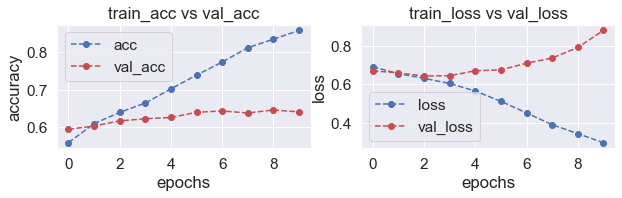

In [206]:
plot_accuracy_loss(history)

We should evaluate the model performance on test set

In [207]:
test_loss = model.evaluate(test_images, test_labels)

72/72 [==============================] - 11s 146ms/step - loss: 1.1960 - accuracy: 0.5844


In [208]:
train_loss = model.evaluate(train_images, train_labels)

507/507 [==============================] - 79s 157ms/step - loss: 0.3133 - accuracy: 0.8850


We see that we achieve 0.76 accuracy on the testing test. We got a slight underfitting :(

Let's see how the classifier is doing on random images.

In [72]:
predictions_train = model.predict(train_images)     # Vector of probabilities
# pred_labels_train = np.argmax(predictions_train, axis = 1) # We take the highest probability
pred_labels_train = ((predictions_train > 0.5)+0).ravel() # (n_images,)

pred_labels_train

array([1, 0, 0, ..., 0, 1, 1])

In [73]:
train_labels

array([1, 0, 0, ..., 0, 0, 1])

In [39]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = ((predictions > 0.5)+0).ravel() # We take the highest probability

In [40]:
test_labels

array([0, 1, 1, ..., 1, 0, 1])

In [41]:
pred_labels

array([0, 0, 0, ..., 1, 1, 0])

In [57]:
import numpy as np
unique, counts = np.unique(pred_labels, return_counts=True)
dict(zip(unique, counts))
# type(pred_labels)

{0: 1253, 1: 1045}

In [42]:
predictions

array([[0.30599463],
       [0.33683896],
       [0.01126558],
       ...,
       [0.865689  ],
       [0.8060218 ],
       [0.15381399]], dtype=float32)

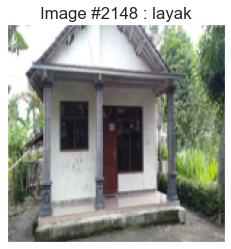

In [52]:
display_random_image(class_names, test_images, pred_labels)

In [105]:
print("pred_labels\n", pred_labels)
print("test_labels\n", test_labels)

pred_labels
 [0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1 1 1 1
 1 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0
 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0]
test_labels
 [1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0
 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0
 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 1 0]


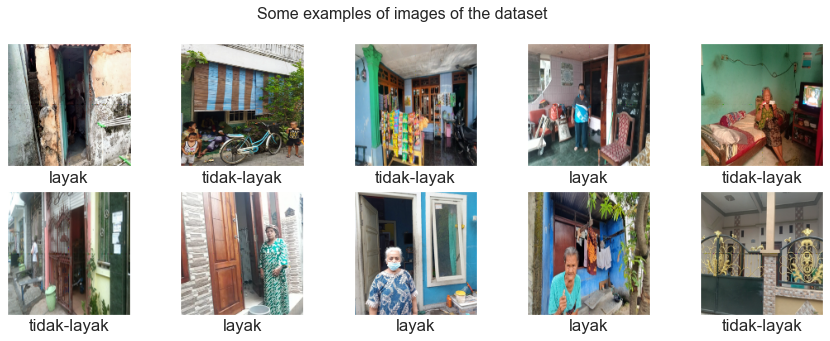

In [106]:
display_examples(class_names, test_images, pred_labels)

In [182]:
len(test_images)
test_labels

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0])

In [ ]:
# load the model
model = pickle.load(open("model.pkl", "rb"))

## Error analysis

We can try to understand on which kind of images the classifier has trouble.

In [46]:
def print_predicted_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels, title)
    
    correct_indices = np.where(BOO == 1)
    correct_images = test_images[correct_indices]
    correct_labels = pred_labels[correct_indices]

    title = "Some examples of correct images by the classifier:"
    display_examples(class_names,  correct_images, correct_labels, title)


In [47]:
print_predicted_images(class_names, test_images, test_labels, pred_labels)

NameError: name 'pred_labels' is not defined

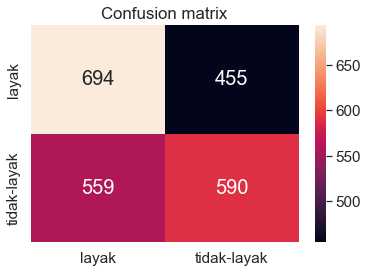

In [63]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 20}, fmt='d',
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

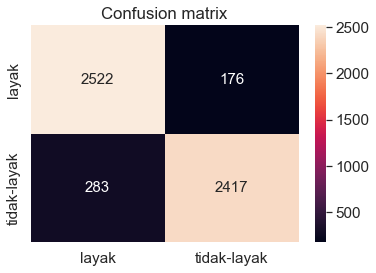

In [74]:
CM = confusion_matrix(train_labels, pred_labels_train)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 15}, fmt='d',
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [70]:
import pickle
pickle.dump(model, open("model-jatim-ori.pkl", "wb"))

INFO:tensorflow:Assets written to: ram://1c05f582-9ebf-4183-b195-43ecc6ef8db9/assets


## Conclusion: The classifier has trouble with 2 kinds of images.
It has trouble with street and buildings. Well, it can be understandable as as there are buildings in the street. 
It has also trouble with sea, glacier and moutain as well. It is hard for me to fully distinguish them.
However, it can detects forest very accurately!

**Intermediate Update January 2020**

* Feature extraction with VGG16 trained on ImageNet


* Ensemble models of Neural Networks with the features extracted from VGG

Inspired from: https://machinelearningmastery.com/model-averaging-ensemble-for-deep-learning-neural-networks/

* Fine Tuning with VGG16 trained on ImageNet

# Feature extraction with VGG ImageNet

We can extract features from VGG16.

In [51]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

model_vgg = VGG16(weights='imagenet', include_top=False)

In [ ]:
tfjs.converters.save_keras_model(model_vgg, 'vgg')

In [190]:
model_vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

Get the features directly from VGG16

In [189]:
coba = model_vgg.predict(test_images[:1])
coba

array([[[[0.8213723 , 0.        , 0.        , ..., 0.        ,
          1.1108909 , 0.        ],
         [1.1072574 , 0.        , 0.        , ..., 0.        ,
          0.624125  , 0.        ],
         [0.2753992 , 0.        , 0.        , ..., 0.        ,
          0.97023857, 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.83222866, 0.        ]],

        [[0.9696418 , 0.        , 0.        , ..., 0.        ,
          0.65086794, 0.        ],
         [1.0445    , 0.        , 0.        , ..., 0.        ,
          0.18654346, 0.        ],
         [0.42123836, 0.        , 0.        , ..., 0.        ,
          0.31182873, 0.        ],
         [0.45886865, 0.        , 0.        , ..., 0.        ,
          0.09481025, 0.        ]],

        [[0.6957936 , 0.        , 0.        , ..., 0.        ,
          0.1509951 , 0.        ],
         [0.2735008 , 0.        , 0.        , ..., 0.        ,
          0.23950106, 0.        ],
         [0.    

In [68]:
train_features = model_vgg.predict(train_images)
test_features = model_vgg.predict(test_images)

In [194]:
for layer in model_vgg.layers:
    print(layer.trainable)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [70]:
with open('test_features.npy', 'wb') as f:
    np.save(f, test_features)
    
with open('train_features.npy', 'wb') as f:
    np.save(f, train_features)

### Load Features

In [19]:
with open('test_features.npy', 'rb') as f:
    test_features = np.load(f)

In [20]:
with open('train_features.npy', 'rb') as f:
    train_features = np.load(f)

## Visualize the features through PCA

In [21]:
n_train, x, y, z = train_features.shape
n_test, x, y, z = test_features.shape
numFeatures = x * y * z

In [22]:
print("numFeatures:", numFeatures)
print("train_features.shape:", train_features.shape)
print("test_features.shape:", test_features.shape)

numFeatures: 8192
train_features.shape: (16194, 4, 4, 512)
test_features.shape: (2298, 4, 4, 512)


In [82]:
from sklearn import decomposition

pca = decomposition.PCA(n_components = 2)

X = train_features.reshape((n_train, x*y*z))
pca.fit(X)

C = pca.transform(X) # Représentation des individus dans les nouveaux axe
C1 = C[:,0]
C2 = C[:,1]

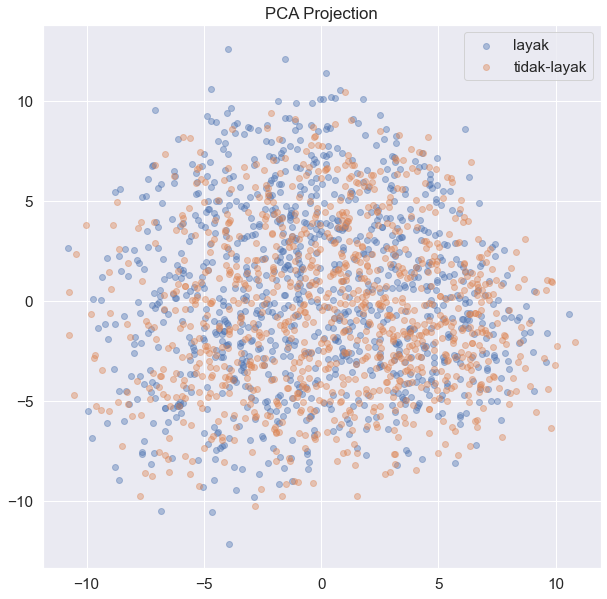

In [83]:
### Figures

plt.subplots(figsize=(10,10))

for i, class_name in enumerate(class_names):
    plt.scatter(C1[train_labels == i][:1000], C2[train_labels == i][:1000], label = class_name, alpha=0.4)
plt.legend()
plt.title("PCA Projection")
plt.show()

We can identifying clusters thanks to this PCA. The clusters correspond more or less to the labels.

We see that glacier and mountain points are very close to each other, as VGG sees them as very similar.

We see that there is no distinction between building and street.
 

## Training on top of VGG

Let's train a simple one-layer Neural Network on the features extracted from VGG.

In [30]:
folder = "training_9"
checkpoint_path = folder + "/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [85]:
train_labels.shape

(16194,)

In [195]:
model2_vgg.fit?

In [91]:
model2_vgg = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (x, y, z)),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

model2_vgg.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

history2 = model2_vgg.fit(train_features, train_labels, batch_size=64, epochs=20, validation_split = 0.2, 
                          callbacks=[cp_callback])

Epoch 1/20
203/203 [==============================] - ETA: 0s - loss: 0.5975 - accuracy: 0.6817
Epoch 1: saving model to training_9\cp.ckpt
203/203 [==============================] - 3s 10ms/step - loss: 0.5975 - accuracy: 0.6817 - val_loss: 0.5602 - val_accuracy: 0.7104
Epoch 2/20
198/203 [============================>.] - ETA: 0s - loss: 0.4981 - accuracy: 0.7530
Epoch 2: saving model to training_9\cp.ckpt
203/203 [==============================] - 2s 9ms/step - loss: 0.4980 - accuracy: 0.7526 - val_loss: 0.5210 - val_accuracy: 0.7345
Epoch 3/20
199/203 [============================>.] - ETA: 0s - loss: 0.4510 - accuracy: 0.7842
Epoch 3: saving model to training_9\cp.ckpt
203/203 [==============================] - 2s 9ms/step - loss: 0.4505 - accuracy: 0.7846 - val_loss: 0.5266 - val_accuracy: 0.7326
Epoch 4/20
200/203 [============================>.] - ETA: 0s - loss: 0.4001 - accuracy: 0.8124
Epoch 4: saving model to training_9\cp.ckpt
203/203 [==============================] - 2s 

In [92]:
# serialize model to JSON
model_json = model2_vgg.to_json()
with open(folder + "/model.json", "w") as json_file:
    json_file.write(model_json)

In [93]:
# serialize weights to HDF5
model2_vgg.save_weights(folder + "/model.h5")
print("Saved model to disk")

Saved model to disk


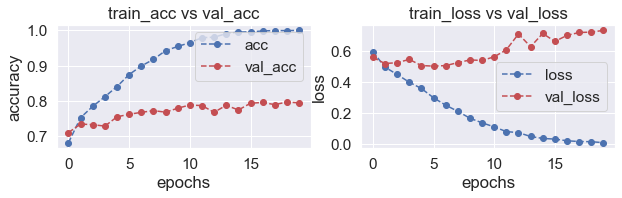

In [94]:
plot_accuracy_loss(history2)

We should get approximately 0.844 accuracy (+0.1 accuracy) over the simple ConvNet.

In [116]:
test_loss = model2_vgg.evaluate(test_features, test_labels)

72/72 [==============================] - 1s 4ms/step - loss: 1.7959 - accuracy: 0.6475


In [117]:
train_loss = model2_vgg.evaluate(train_features, train_labels)

507/507 [==============================] - 98s 194ms/step - loss: 0.1546 - accuracy: 0.9588


In [34]:
# predictions_vgga = model2_vgg.predict(test_features)     # Vector of probabilities
predictions_vgg = model2_vgg_load.predict(test_features)     # Vector of probabilities
pred_labels_vgg = ((predictions_vgg > 0.45)+0).ravel() # We take the highest probability

# display_random_image(class_names, test_images, pred_labels)

In [35]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(test_labels, pred_labels_vgg))

0.6440382941688425


In [153]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(test_labels, pred_labels_vgg))

0.6414273281114012


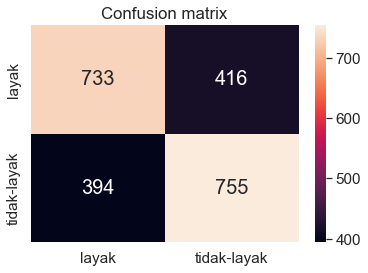

In [164]:
CM = confusion_matrix(test_labels, pred_labels_vgg)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 20}, fmt='d',
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

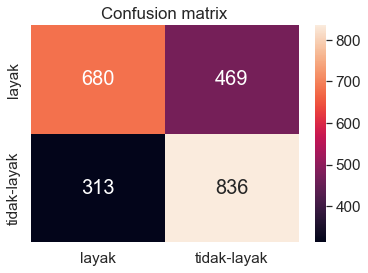

In [234]:
CM = confusion_matrix(test_labels, pred_labels_vgg)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 20}, fmt='d',
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [235]:
predictions_train_vgg = model2_vgg.predict(train_features)     # Vector of probabilities
pred_labels_train_vgg = ((predictions_train_vgg > 0.4)+0).ravel() # We take the highest probability

# display_random_image(class_names, test_images, pred_labels)

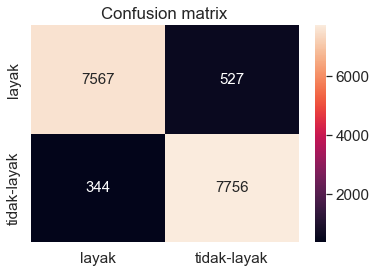

In [236]:
CM = confusion_matrix(train_labels, pred_labels_train_vgg)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 15}, fmt='d',
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

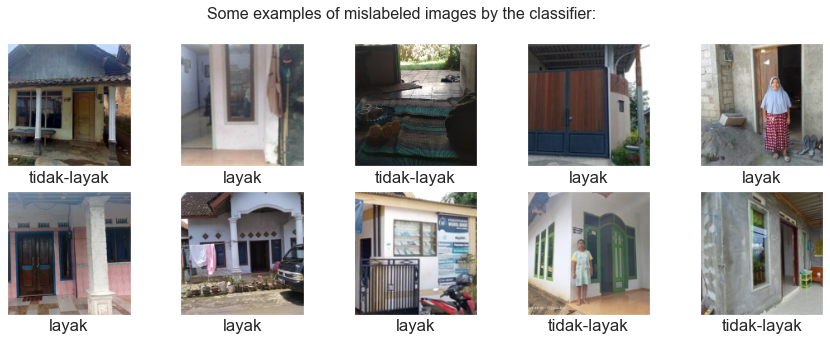

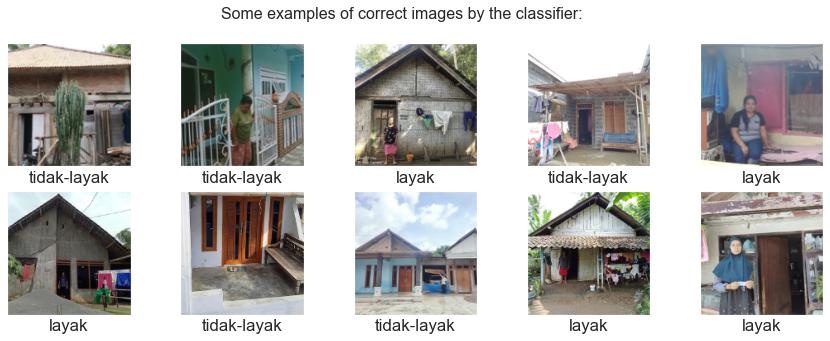

In [50]:
print_predicted_images(class_names, test_images, test_labels, pred_labels_vgg)

### Lainnya

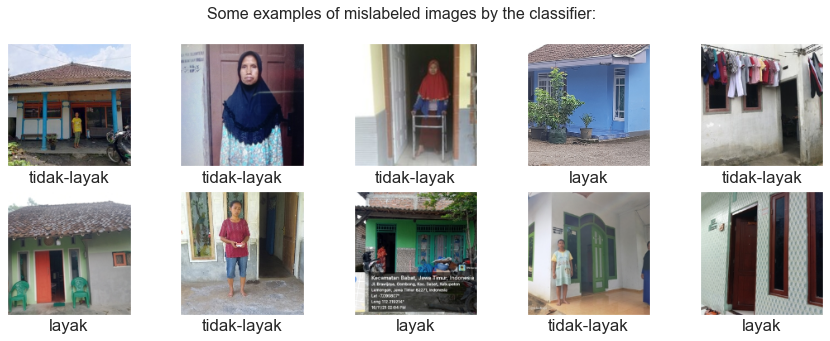

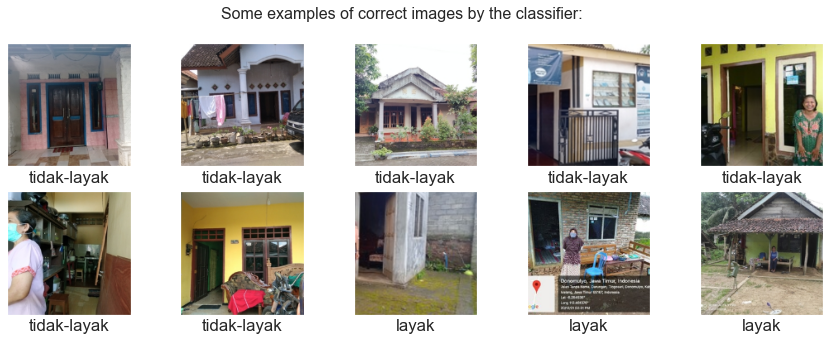

In [239]:
print_predicted_images(class_names, test_images, test_labels, pred_labels_vgg)

In [240]:
model2_vgg.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 50)                409650    
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 409,701
Trainable params: 409,701
Non-trainable params: 0
_________________________________________________________________


# Deployment

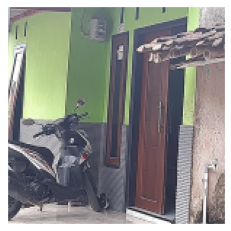

prediction: tidak layak (0.63687986)


In [110]:
def prediction(img_path):
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     wh = min(image.shape[0], image.shape[1]) - 1
#     image = get_random_crop(image, wh, wh)
    image = cv2.resize(image, IMAGE_SIZE) 
    image = np.array(image, dtype = 'float32')
    image = image / 255.0

    plt.figure()
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.show()

#     print(np.array([image]))
    image_features = model_vgg.predict(np.array([image]))
    predictions_vgg = model2_vgg_load.predict(image_features)     # Vector of probabilities
    pred_labels_vgg = ((predictions_vgg > 0.45)+0).ravel() # We take the highest probability
    
    if(pred_labels_vgg):
        np.set_printoptions(suppress=True)
        print("prediction: tidak layak (" + str(predictions_vgg[0][0]) + ")")
    else :
        np.set_printoptions(suppress=True)
        print("prediction: layak (" + str(predictions_vgg[0][0]) + ")")
    
prediction('../1_WrappingData/img/testing/tidak-layak/2702.jpg')

# Save Model into Tfjs

In [95]:
import tensorflowjs as tfjs

In [96]:
tfjs.converters.save_keras_model(model2_vgg, folder)

---
# Load Model

In [26]:
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape = (x, y, z)),
        tf.keras.layers.Dense(100, activation=tf.nn.relu),
        tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
    ])

    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

    return model

model2_vgg_load = create_model()

In [27]:
model2_vgg_load.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 100)               819300    
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 819,401
Trainable params: 819,401
Non-trainable params: 0
_________________________________________________________________


In [28]:
test_loss_load = model2_vgg_load.evaluate(test_features, test_labels)

72/72 [==============================] - 1s 6ms/step - loss: 0.9390 - accuracy: 0.5000


In [31]:
model2_vgg_load.load_weights(folder + '/model.h5')
model2_vgg_load.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 100)               819300    
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 819,401
Trainable params: 819,401
Non-trainable params: 0
_________________________________________________________________


In [32]:
test_loss_load = model2_vgg_load.evaluate(test_features, test_labels)

72/72 [==============================] - 0s 4ms/step - loss: 1.7959 - accuracy: 0.6475


In [71]:
predictions_vgg_load = model2_vgg_load.predict(test_features)     # Vector of probabilities
pred_labels_vgg_load = ((predictions_vgg_load > 0.4)+0).ravel() # We take the highest probability

print(predictions_vgg_load)
print(pred_labels_vgg_load)

[[0.05755442]
 [0.11271846]
 [0.00309888]
 ...
 [0.40272677]
 [0.9774235 ]
 [0.93431413]]
[0 0 0 ... 1 1 1]


In [109]:
predictions_vgg_load = model2_vgg_load.predict(test_features)     # Vector of probabilities
pred_labels_vgg_load = ((predictions_vgg_load > 0.4)+0).ravel() # We take the highest probability

print(predictions_vgg_load)
print(pred_labels_vgg_load)

[[0.9030874 ]
 [0.00437915]
 [0.973771  ]
 ...
 [0.99958336]
 [0.99995244]
 [0.99999905]]
[1 0 1 ... 1 1 1]


### Coba coba

In [203]:
!tensorflowjs_converter --input_format=keras C:\Users\Agus Zainal Arifin\Documents\KP\image-classification\image-classification-house\2_Model\training_8\model.h5 C:\Users\Agus Zainal Arifin\Documents\KP\image-classification\image-classification-house\2_Model\training_8

'tensorflowjs_converter' is not recognized as an internal or external command,
operable program or batch file.


In [142]:
# train_features = model_vgg.predict(train_images)
coba_feature = model_vgg.predict(test_images[1:2])

In [143]:
model2_vgg_load.predict(coba_feature)

array([[0.1127184]], dtype=float32)

# Analysis

In [167]:
pred_vec_ = list(np.asarray(predictions_vgg).ravel())
pred_vec_

[0.9030874,
 0.0043791533,
 0.973771,
 0.45662948,
 0.030756533,
 0.99999976,
 5.0934696e-13,
 0.8102955,
 0.0006456673,
 0.28116107,
 7.6187935e-05,
 0.998798,
 0.9997083,
 4.1032317e-07,
 0.0005813241,
 0.35603166,
 0.059247404,
 0.9999235,
 0.3612942,
 0.97868586,
 0.9999645,
 0.9814664,
 0.98161113,
 0.99998367,
 7.126864e-07,
 0.42941314,
 4.373987e-05,
 0.37141955,
 0.999203,
 0.00016066432,
 0.99900055,
 0.14594492,
 0.99999833,
 0.3864172,
 0.0002309084,
 0.25804645,
 0.037971735,
 0.0023274124,
 0.00031024218,
 5.401843e-07,
 1.797839e-05,
 0.95209455,
 0.045708805,
 0.00010473534,
 0.9397125,
 0.9912043,
 0.055318713,
 0.9876733,
 0.5390302,
 0.8440642,
 0.5971786,
 0.000997901,
 0.033906758,
 0.9322177,
 0.9659207,
 0.98623705,
 0.9999087,
 0.93036807,
 0.9947189,
 0.9994223,
 0.36853892,
 0.040109783,
 0.11810395,
 0.089162916,
 0.0018700659,
 0.99939585,
 0.9999752,
 0.99989796,
 0.7975038,
 0.99999976,
 0.9996053,
 0.97599554,
 0.14512631,
 0.22863322,
 2.6907456e-08,
 8.

In [168]:
pred_lab_load = list(pred_labels_vgg)
pred_lab_load

[1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,


In [169]:
test_labels_list = list(test_labels)
test_labels_list

[0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [170]:
def show_df_image(df, img, lab, id):
    print(df_pred.iloc[id])
    display_image(class_names, img, lab, id)

In [171]:
df_pred = pd.DataFrame({'vector_prediction':pred_vec_,
                        'labels_prediction':pred_lab_load,
                        'labels_actual':test_labels_list})
df_pred

vector_prediction  labels_prediction  labels_actual
0              0.903087                  1              0
1              0.004379                  0              1
2              0.973771                  1              1
3              0.456629                  1              0
4              0.030757                  0              1
...                 ...                ...            ...
2293           0.995366                  1              1
2294           0.235548                  0              0
2295           0.999583                  1              1
2296           0.999952                  1              0
2297           0.999999                  1              1

[2298 rows x 3 columns]

C:\Users\Agus Zainal Arifin\anaconda3\envs\nevin\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='vector_prediction'>

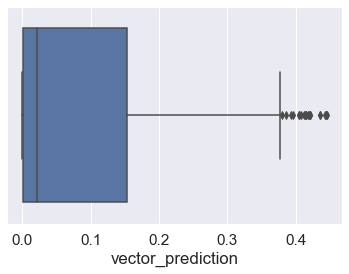

In [181]:
import seaborn as sns
false_negatif = df_pred.loc[(df_pred['labels_prediction'] != df_pred['labels_actual']) & (df_pred['labels_actual'] == 1)]
sns.boxplot(false_negatif.vector_prediction)

In [182]:
false_negatif

vector_prediction  labels_prediction  labels_actual
1              0.004379                  0              1
4              0.030757                  0              1
8              0.000646                  0              1
15             0.356032                  0              1
16             0.059247                  0              1
...                 ...                ...            ...
2228           0.032174                  0              1
2247           0.018537                  0              1
2258           0.012959                  0              1
2290           0.000045                  0              1
2292           0.154380                  0              1

[386 rows x 3 columns]

In [187]:
false_negatif.loc[(false_negatif['vector_prediction'] < 0.05)]

vector_prediction  labels_prediction  labels_actual
1          4.379153e-03                  0              1
4          3.075653e-02                  0              1
8          6.456673e-04                  0              1
24         7.126864e-07                  0              1
38         3.102422e-04                  0              1
...                 ...                ...            ...
2224       1.396912e-05                  0              1
2228       3.217426e-02                  0              1
2247       1.853740e-02                  0              1
2258       1.295879e-02                  0              1
2290       4.501030e-05                  0              1

[232 rows x 3 columns]

In [118]:
df_pred.to_csv('df_pred.csv', index=False)

vector_prediction    0.977423
labels_prediction    1.000000
labels_actual        0.000000
Name: 2296, dtype: float64


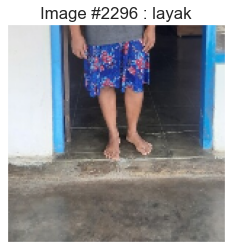

In [116]:
show_df_image(df_pred, test_images, test_labels, 2296)

In [108]:
with open('test_images.npy', 'wb') as f:
    np.save(f, test_images)
with open('train_images.npy', 'wb') as f:
    np.save(f, train_images)

In [87]:
import pandas as pd
from IPython.core.display import display,HTML

df = pd.DataFrame([['A231', 'Book', 5, 3, 150], 
                   ['M441', 'Magic Staff', 10, 7, 200]],
                   columns = ['Code', 'Name', 'Price', 'Net', 'Sales'])

# your images
images1 = ['https://vignette.wikia.nocookie.net/2007scape/images/7/7a/Mage%27s_book_detail.png/revision/latest?cb=20180310083825',
          'https://i.pinimg.com/originals/d9/5c/9b/d95c9ba809aa9dd4cb519a225af40f2b.png'] 


images2 = ['https://static3.srcdn.com/wordpress/wp-content/uploads/2020/07/Quidditch.jpg?q=50&fit=crop&w=960&h=500&dpr=1.5',
           'https://specials-images.forbesimg.com/imageserve/5e160edc9318b800069388e8/960x0.jpg?fit=scale']

df['imageUrls'] = images1
df['otherImageUrls'] = images2


# convert your links to html tags 
def path_to_image_html(path):
    return '<img src="'+ path + '" width="60" >'

pd.set_option('display.max_colwidth', None)

image_cols = ['imageUrls', 'otherImageUrls']  #<- define which columns will be used to convert to html

# Create the dictionariy to be passed as formatters
format_dict = {}
for image_col in image_cols:
    format_dict[image_col] = path_to_image_html


display(HTML(df.to_html(escape=False ,formatters=format_dict)))

---
---
---

In [86]:
!pip install fastapi uvicorn

     ---------------------------------------- 54.6/54.6 kB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 57.0/57.0 kB ? eta 0:00:00
     ---------------------------------------- 63.3/63.3 kB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 1.9/1.9 MB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 80.6/80.6 kB 4.4 MB/s eta 0:00:00


# Ensemble Neural Networks

In [137]:
np.random.seed(seed=1997)
# Number of estimators
n_estimators = 10
# Proporition of samples to use to train each training
max_samples = 0.8

max_samples *= n_train
max_samples = int(max_samples)

We define n_estimators Neural Networks. 

Each Neural Network will be trained on random subsets of the training dataset. Each subset contains max_samples samples.

In [138]:
models = list()
random = np.random.randint(50, 100, size = n_estimators)

for i in range(n_estimators):
    
    # Model
    model = tf.keras.Sequential([ tf.keras.layers.Flatten(input_shape = (x, y, z)),
                                # One layer with random size
                                    tf.keras.layers.Dense(random[i], activation=tf.nn.relu),
                                    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
                                ])
    
    model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Store model
    models.append(model)

In [139]:
histories = []

for i in range(n_estimators):
    # Train each model on a bag of the training data
    train_idx = np.random.choice(len(train_features), size = max_samples)
    histories.append(models[i].fit(train_features[train_idx], train_labels[train_idx], batch_size=128, epochs=10, validation_split = 0.1))

Epoch 1/10
3/3 [==============================] - 1s 103ms/step - loss: 9.2110 - accuracy: 0.4079 - val_loss: 27.4879 - val_accuracy: 0.5484
Epoch 2/10
3/3 [==============================] - 0s 39ms/step - loss: 15.8432 - accuracy: 0.6715 - val_loss: 39.8110 - val_accuracy: 0.4516
Epoch 3/10
3/3 [==============================] - 0s 44ms/step - loss: 20.0646 - accuracy: 0.5632 - val_loss: 4.3413 - val_accuracy: 0.7742
Epoch 4/10
3/3 [==============================] - 0s 41ms/step - loss: 7.0473 - accuracy: 0.6859 - val_loss: 1.3295 - val_accuracy: 0.8710
Epoch 5/10
3/3 [==============================] - 0s 41ms/step - loss: 0.7648 - accuracy: 0.9206 - val_loss: 14.9545 - val_accuracy: 0.5484
Epoch 6/10
3/3 [==============================] - 0s 43ms/step - loss: 1.3849 - accuracy: 0.8881 - val_loss: 3.2481 - val_accuracy: 0.7419
Epoch 7/10
3/3 [==============================] - 0s 42ms/step - loss: 0.1301 - accuracy: 0.9819 - val_loss: 0.3936 - val_accuracy: 0.9677
Epoch 8/10
3/3 [=====

We aggregate each model individual predictions to form a final prediction.

In [140]:
predictions = []
for i in range(n_estimators):
    predictions.append(models[i].predict(test_features))
    
predictions = np.array(predictions)
predictions = predictions.sum(axis = 0)
pred_labels = predictions.argmax(axis=1)

We should improve our result as we have a lower variance.

In [141]:
from sklearn.metrics import accuracy_score
print("Accuracy : {}".format(accuracy_score(test_labels, pred_labels)))

Accuracy : 0.4742268041237113


# Fine Tuning VGG ImageNet

In [155]:
from keras.models import Model

model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=model.inputs, outputs=model.layers[-5].output)

In [156]:
train_features = model.predict(train_images)
test_features = model.predict(test_images)

In [241]:
from keras.layers import Input, Dense, Conv2D, Activation , MaxPooling2D, Flatten

model2 = VGG16(weights='imagenet', include_top=False)

input_shape = model2.layers[-4].get_input_shape_at(0) # get the input shape of desired layer
layer_input = Input(shape = (9, 9, 512)) # a new input tensor to be able to feed the desired layer
# https://stackoverflow.com/questions/52800025/keras-give-input-to-intermediate-layer-and-get-final-output

x = layer_input
for layer in model2.layers[-4::1]:
    x = layer(x)
    
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(100,activation='relu')(x)
x = Dense(2,activation='softmax')(x)

# create the model
new_model = Model(layer_input, x)

In [242]:
new_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', 
                  metrics = [tf.keras.metrics.BinaryAccuracy(name="accuracy", dtype=None, threshold=0.5)])

In [243]:
new_model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 9, 9, 512)]       0         
                                                                 
 block5_conv1 (Conv2D)       multiple                  2359808   
                                                                 
 block5_conv2 (Conv2D)       multiple                  2359808   
                                                                 
 block5_conv3 (Conv2D)       multiple                  2359808   
                                                                 
 block5_pool (MaxPooling2D)  multiple                  0         
                                                                 
 conv2d_30 (Conv2D)          (None, 2, 2, 64)          294976    
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 1, 1, 64)         0   

In [247]:
history = new_model.fit(train_images, train_labels, batch_size=128, epochs=10, validation_split = 0.2)

Epoch 1/10


ValueError: in user code:

    File "C:\Users\Agus Zainal Arifin\anaconda3\envs\nevin\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Agus Zainal Arifin\anaconda3\envs\nevin\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Agus Zainal Arifin\anaconda3\envs\nevin\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Agus Zainal Arifin\anaconda3\envs\nevin\lib\site-packages\keras\engine\training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\Agus Zainal Arifin\anaconda3\envs\nevin\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Agus Zainal Arifin\anaconda3\envs\nevin\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "model_6" is incompatible with the layer: expected shape=(None, 9, 9, 512), found shape=(None, 150, 150, 3)


In [245]:
history.history

{'loss': [1.1267977952957153,
  0.7001156210899353,
  0.6931981444358826,
  0.6931790113449097,
  0.6931717991828918,
  0.6931641697883606,
  0.693157970905304,
  0.6931524872779846,
  0.693149983882904,
  0.6931488513946533,
  0.693148136138916,
  0.6931476593017578,
  0.6931476593017578,
  0.6931474804878235,
  0.6931473612785339],
 'accuracy': [0.4318181872367859,
  0.5324675440788269,
  0.5422077775001526,
  0.48051947355270386,
  0.5324675440788269,
  0.5357142686843872,
  0.5324675440788269,
  0.5389610528945923,
  0.5129870176315308,
  0.4577922224998474,
  0.5,
  0.48051947355270386,
  0.5,
  0.47727271914482117,
  0.49025973677635193],
 'val_loss': [0.7052609920501709,
  0.6931710243225098,
  0.6931675672531128,
  0.6931611895561218,
  0.6931585669517517,
  0.6931537985801697,
  0.6931506395339966,
  0.6931489109992981,
  0.6931480765342712,
  0.6931475400924683,
  0.6931473016738892,
  0.6931472420692444,
  0.6931471228599548,
  0.6931470632553101,
  0.6931470632553101],
 'va

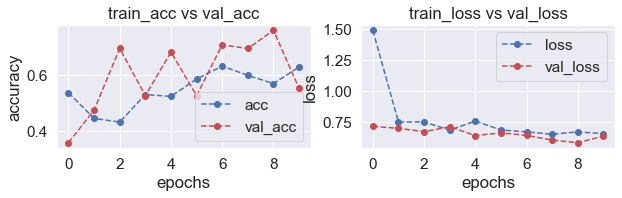

In [162]:
plot_accuracy_loss(history)

In [163]:
from sklearn.metrics import accuracy_score

predictions = new_model.predict(test_features)    
pred_labels = np.argmax(predictions, axis = 1)
print("Accuracy : {}".format(accuracy_score(test_labels, pred_labels)))

Accuracy : 0.5360824742268041


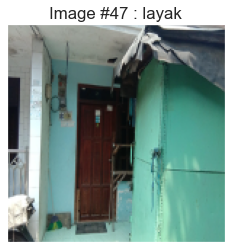

In [164]:
display_random_image(class_names, test_images, pred_labels)

In [165]:
pred_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)